In [139]:
#step1 of data analysis- collecting data
!pip install scikit-learn
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math

TitanicTested=pd.read_csv("C:/Users/swarn/Desktop/tested.csv")
TitanicTested.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [93]:
print("Total number of people on the ship are : " +str(len(TitanicTested.index)))

Total number of people on the ship are : 418


In [34]:
#step 2 : cleaning the data
#checking null values
TitanicTested.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
#we can clean the data by removing cabin col
TitanicTested.drop("Cabin",axis=1,inplace=True)

In [94]:
TitanicTested.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [46]:
TitanicTested.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [67]:
#Mean of age =30.3, therefore we replace the Null values in the coloumn Age
#with the mean of the age
TitanicTested.fillna(method='bfill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,,0,0,359309,8.0500,S


In [69]:
TitanicTested.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

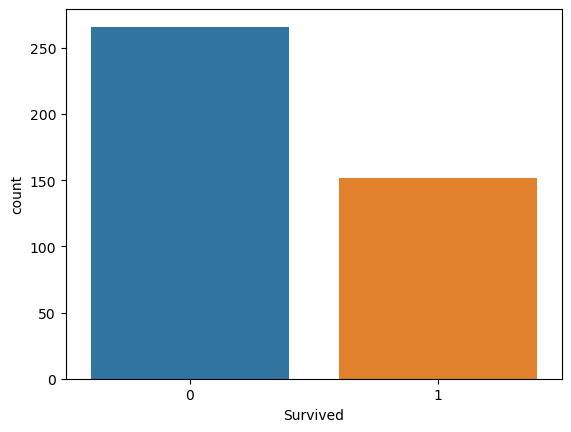

In [59]:
#step 3 analyzing dependencies of variables
#creating a plot
sns.countplot(x="Survived",data=TitanicTested)

<Axes: xlabel='Sex', ylabel='count'>

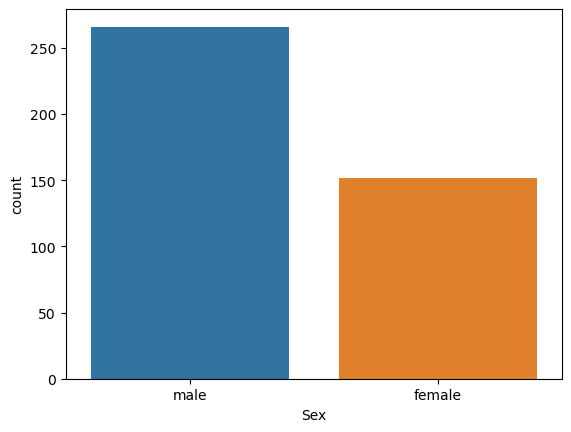

In [22]:
sns.countplot(x="Sex",data=TitanicTested)

<Axes: xlabel='Survived', ylabel='count'>

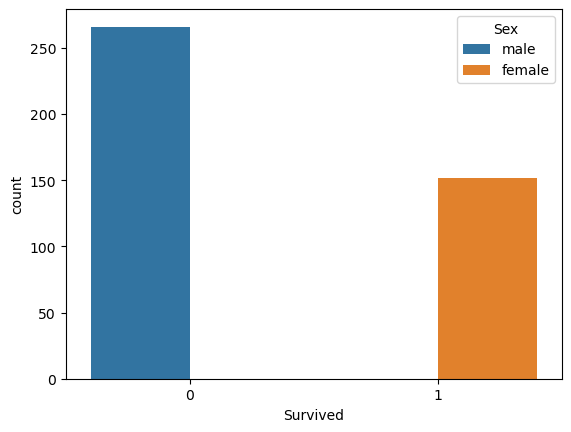

In [25]:
sns.countplot(x="Survived", hue="Sex", data=TitanicTested)

<Axes: xlabel='Survived', ylabel='count'>

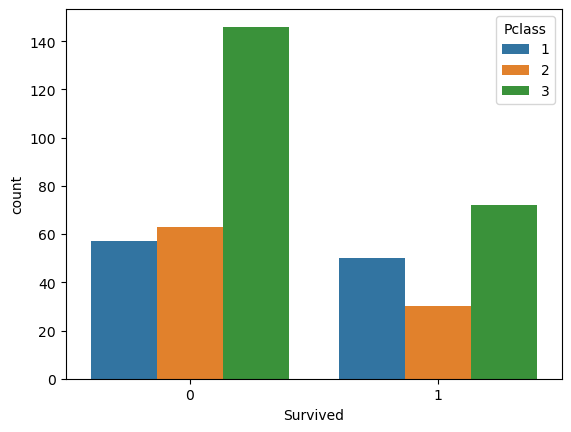

In [30]:
sns.countplot(x="Survived", hue="Pclass", data=TitanicTested)

In [ ]:
#In order to implement Logistic regression we create the other train values to categorical variables of true and false (0 and 1)
#I am using the concept of dummy variables so that I can create categorical variables out of coloumns

In [96]:
sex=pd.get_dummies(TitanicTested['Sex'],drop_first=True)

In [97]:
Pcl=pd.get_dummies(TitanicTested["Pclass"],drop_first=True)

In [99]:
TitanicTested=pd.concat([TitanicTested,sex,Pcl],axis=1)

In [100]:
TitanicTested.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,male,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1


In [102]:
TitanicTested.drop(['Sex','Pclass','Ticket','Name','Embarked',],axis=1, inplace= True)

In [103]:
TitanicTested.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,male,2,3
0,892,0,34.5,0,0,7.8292,1,1,0,1
1,893,1,47.0,1,0,7.0000,0,0,0,1
2,894,0,62.0,0,0,9.6875,1,1,1,0
3,895,0,27.0,0,0,8.6625,1,1,0,1
4,896,1,22.0,1,1,12.2875,0,0,0,1


In [115]:
#Training and testing model for Logistic Regression
X=TitanicTested.drop(['Survived'], axis=1)
Y=TitanicTested['Survived']

In [2]:
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.7, random_state=4)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Model=LogisticRegression()

In [ ]:
Model.fit(X_train, Y_train)

In [ ]:
predictions= Model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(Y_test,predictions)